# Primary Spoken Language of Applicants for Insurance Affordability Programs

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Primary Spoken Language of Applicants for Insurance Affordability Programs.csv")

In [3]:
df.head()


,Year,Reporting Period,Primary Spoken Language,Number of Applicants
0,2016,2016 Q1,English,840981
1,2016,2016 Q1,Spanish,319235
2,2016,2016 Q1,Vietnamese,9221
3,2016,2016 Q1,Cantonese,5408
4,2016,2016 Q1,Mandarin,6724


In [4]:
df.tail()

,Year,Reporting Period,Primary Spoken Language,Number of Applicants
275,2020,2020 Q4,Russian,915
276,2020,2020 Q4,Spanish,52789
277,2020,2020 Q4,Tagalog,1079
278,2020,2020 Q4,Vietnamese,2894
279,2020,2020 Q4,Not Reported,1045


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     280 non-null    int64 
 1   Reporting Period         280 non-null    object
 2   Primary Spoken Language  280 non-null    object
 3   Number of Applicants     280 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [6]:
df['Primary Spoken Language'].value_counts()

Not Reported    20
English         20
Farsi           20
Mandarin        20
Cantonese       20
Cambodian       20
Tagalog         20
Armenian        20
Korean          20
Vietnamese      20
Russian         20
Hmong           20
Spanish         20
Arabic          20
Name: Primary Spoken Language, dtype: int64

In [7]:
df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum()

Primary Spoken Language
Arabic            32955
Armenian          36818
Cambodian          7165
Cantonese         60014
English         9023681
Farsi             28516
Hmong              8252
Korean            46015
Mandarin          97073
Not Reported     193804
Russian           30310
Spanish         2401645
Tagalog           30039
Vietnamese       101676
Name: Number of Applicants, dtype: int64

In [8]:
df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum().sort_values()

Primary Spoken Language
Cambodian          7165
Hmong              8252
Farsi             28516
Tagalog           30039
Russian           30310
Arabic            32955
Armenian          36818
Korean            46015
Cantonese         60014
Mandarin          97073
Vietnamese       101676
Not Reported     193804
Spanish         2401645
English         9023681
Name: Number of Applicants, dtype: int64

In [9]:
df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum().sort_values(ascending=False)

Primary Spoken Language
English         9023681
Spanish         2401645
Not Reported     193804
Vietnamese       101676
Mandarin          97073
Cantonese         60014
Korean            46015
Armenian          36818
Arabic            32955
Russian           30310
Tagalog           30039
Farsi             28516
Hmong              8252
Cambodian          7165
Name: Number of Applicants, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

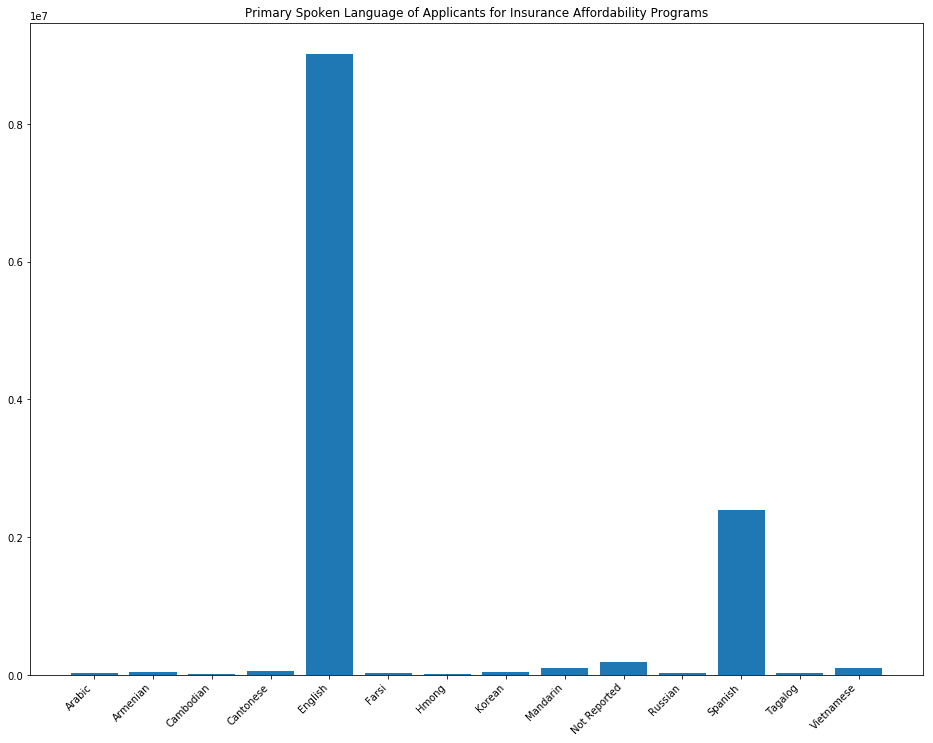

In [10]:
plt.figure(figsize=(16,12))
plt.bar(df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum().keys(), df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum())
plt.title("Primary Spoken Language of Applicants for Insurance Affordability Programs")
plt.xticks(rotation=45, ha='right')

In [11]:
from sklearn import preprocessing

In [12]:
total = df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum()

In [13]:
x_array = np.array([total])

In [14]:
df_normalize = preprocessing.normalize(x_array)
df_normalize

array([[3.52781956e-03, 3.94135216e-03, 7.67010381e-04, 6.42447467e-03,
        9.65981438e-01, 3.05262638e-03, 8.83373296e-04, 4.92588733e-03,
        1.03916258e-02, 2.07466406e-02, 3.24467336e-03, 2.57095136e-01,
        3.21566292e-03, 1.08843751e-02]])

In [15]:
names = df.groupby(['Primary Spoken Language'])['Number of Applicants'].sum().keys()

In [16]:
scaled_df = pd.DataFrame(df_normalize, columns = names).transpose()
scaled_df

,0
Primary Spoken Language,
Arabic,0.003528
Armenian,0.003941
Cambodian,0.000767
Cantonese,0.006424
English,0.965981
Farsi,0.003053
Hmong,0.000883
Korean,0.004926
Mandarin,0.010392


In [17]:
scaled_df = scaled_df.rename(columns={0:"Total"})

In [18]:
scaled_df 

,Total
Primary Spoken Language,
Arabic,0.003528
Armenian,0.003941
Cambodian,0.000767
Cantonese,0.006424
English,0.965981
Farsi,0.003053
Hmong,0.000883
Korean,0.004926
Mandarin,0.010392


In [19]:
scaled_df['Total'].values

array([3.52781956e-03, 3.94135216e-03, 7.67010381e-04, 6.42447467e-03,
       9.65981438e-01, 3.05262638e-03, 8.83373296e-04, 4.92588733e-03,
       1.03916258e-02, 2.07466406e-02, 3.24467336e-03, 2.57095136e-01,
       3.21566292e-03, 1.08843751e-02])

In [20]:
scaled_df['Total'].keys()

Index(['Arabic', 'Armenian', 'Cambodian', 'Cantonese', 'English', 'Farsi',
       'Hmong', 'Korean', 'Mandarin', 'Not Reported', 'Russian', 'Spanish',
       'Tagalog', 'Vietnamese'],
      dtype='object', name='Primary Spoken Language')

In [21]:
def f(x): 
    return np.int(x) 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

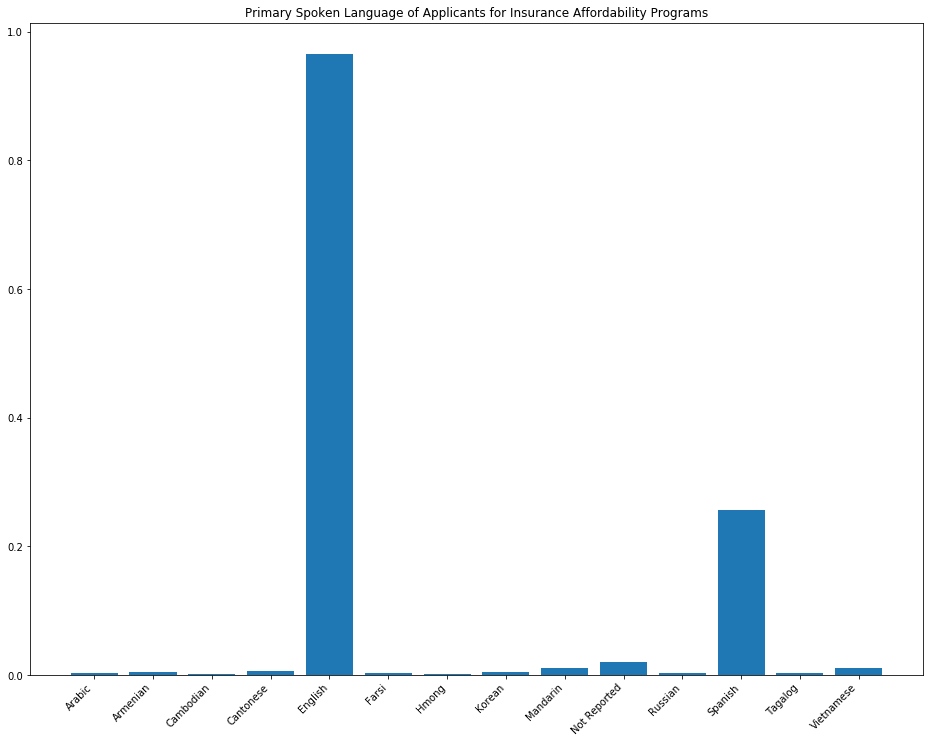

In [22]:
plt.figure(figsize=(16,12))
f2 = np.vectorize(f) 
plt.bar(scaled_df['Total'].keys(), scaled_df['Total'].values)
plt.title("Primary Spoken Language of Applicants for Insurance Affordability Programs")
plt.xticks(rotation=45, ha='right')

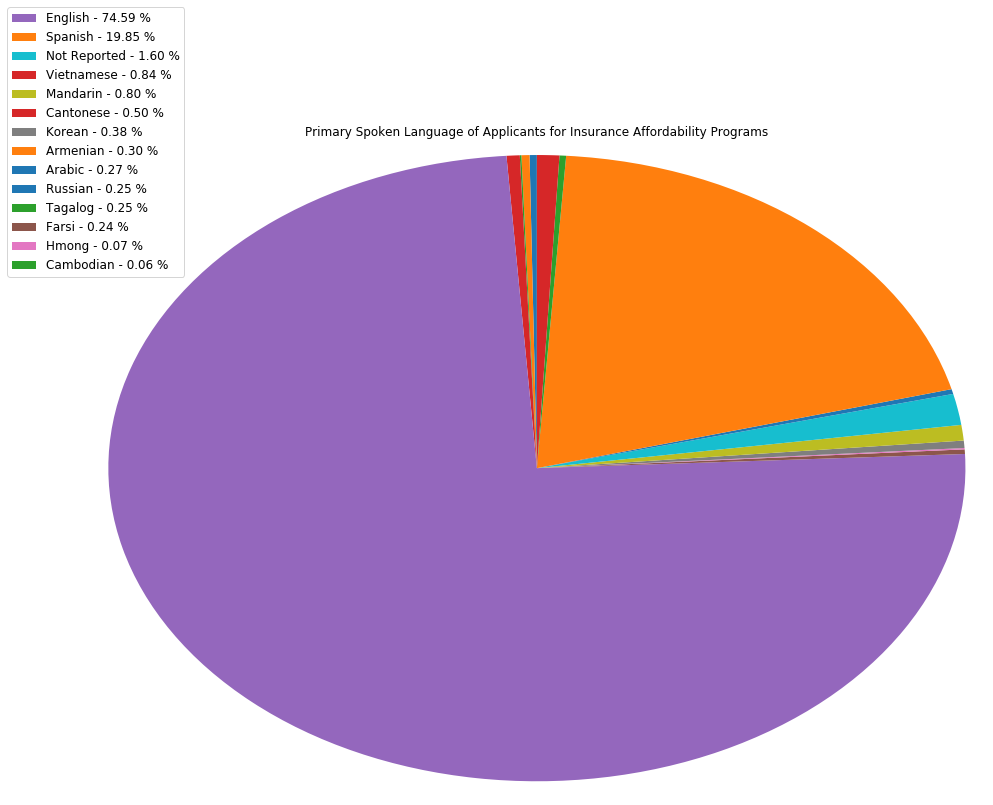

In [23]:
x = labels=scaled_df['Total'].keys()
y = scaled_df['Total'].values
fig1, ax1 = plt.subplots(figsize=(16,12))
patches, texts = plt.pie(y, startangle=90, radius=1.2)
percent = 100.*y/y.sum()

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]


sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("Primary Spoken Language of Applicants for Insurance Affordability Programs")

plt.show()